In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from notebook.notebook_utils import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/results/base_uncased_gap2_norm4_lead5.csv')

Splitting the 'scores' column into 3 columns for each assessor  

In [ ]:
df = split_scores(df, 'scores')

Calculating the mean value between two assessors

In [ ]:
df = get_mean(df, 'assesor_1', 'assesor_2')
df = get_mean(df, 'assesor_1', 'assesor_3')
df = get_mean(df, 'assesor_2', 'assesor_3')

Scattered plot for BLANC score and mean Direct Assessment (DA) score

Text(0, 0.5, 'blanc')

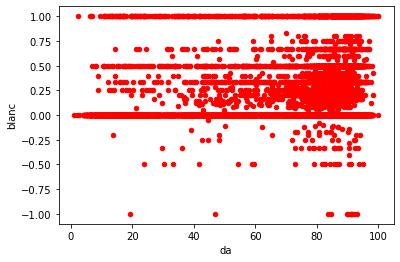

In [ ]:
ax = df.plot(kind='scatter', x='mean', y='score', color='r')    
ax.set_xlabel('da')
ax.set_ylabel('blanc')

Pearson correlation table

In [ ]:
df.corr(method='pearson')

,segid,mean,z_mean,model_scores,score
segid,1.000000,0.484763,0.424325,0.306864,0.104647
mean,0.484763,1.000000,0.983496,0.574323,0.173505
z_mean,0.424325,0.983496,1.000000,0.556503,0.163234
model_scores,0.306864,0.574323,0.556503,1.000000,0.203052
score,0.104647,0.173505,0.163234,0.203052,1.000000


Distribution of BLANC score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1a2810358>]],
      dtype=object)

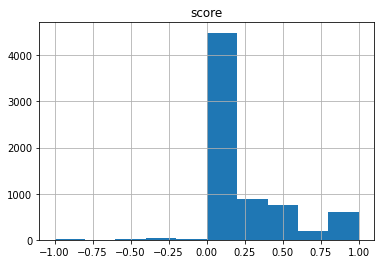

In [ ]:
df.hist(column='score')

Mean BLANC score

In [ ]:
df['score'].mean()

0.20277807134079237

Proportion of BLANC scores with zero values

In [ ]:
len(df[df.score==0])/len(df)

0.57

Proportion of BLANC scores with positive values

In [ ]:
len(df[df.score>0])/len(df)

0.417

New column for sentence lengnth in Russian text

In [ ]:
df['sentence_len'] = df['original'].str.split().str.len()

Scattered plot for BLANC score and sentence lenght in Russian text

Text(0, 0.5, 'blanc')

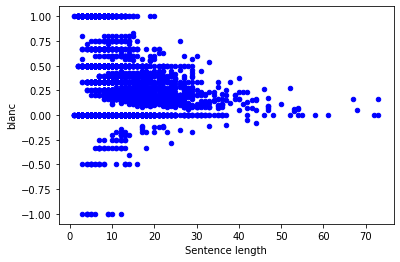

In [ ]:
ax1 = df.plot(kind='scatter', x='sentence_len', y='score', color='b')    
ax1.set_xlabel('Sentence length')
ax1.set_ylabel('blanc')

# Shuffled translation and replaced words

In [ ]:
df_shuf = pd.read_csv('/content/base_uncased_gap2_norm4_lead5_shuf.csv')
df_repl = pd.read_csv('/content/base_uncased_gap2_norm4_lead5_replace1.csv')

Mean BLANC score for shuffled text

In [ ]:
df_shuf['score'].mean()

0.07770383837929719

Pearson correlation between BLANC score and mean DA for shuffled text

In [ ]:
df_shuf['score'].corr(df_shuf['mean'])

0.08837567073088529

Pearson correlation between BLANC score and mean DA for text with replaced words

In [ ]:
df_repl['score'].corr(df_repl['mean'])

0.15273056359662124

Mean BLANC score for text with replaced words

In [ ]:
df_repl['score'].mean()

0.15373054347183662

Distribution of BLANC score of shuffled text

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5d09e36d8>]],
      dtype=object)

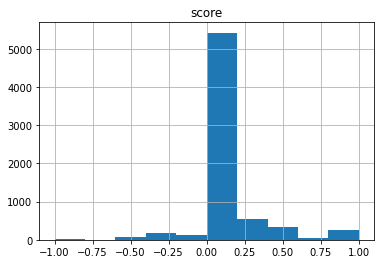

In [ ]:
df_shuf.hist(column='score')

Sorting datasets based on BLANC scores

In [ ]:
df = df.sort_values(by=['score'])
df_shuf = df_shuf.sort_values(by=['score'])
df_repl = df_repl.sort_values(by=['score'])

Adding index column

In [ ]:
df = add_index_col(df)
df_shuf = add_index_col(df_shuf)
df_repl = add_index_col(df_repl)

Scattered plot of sorted datasets

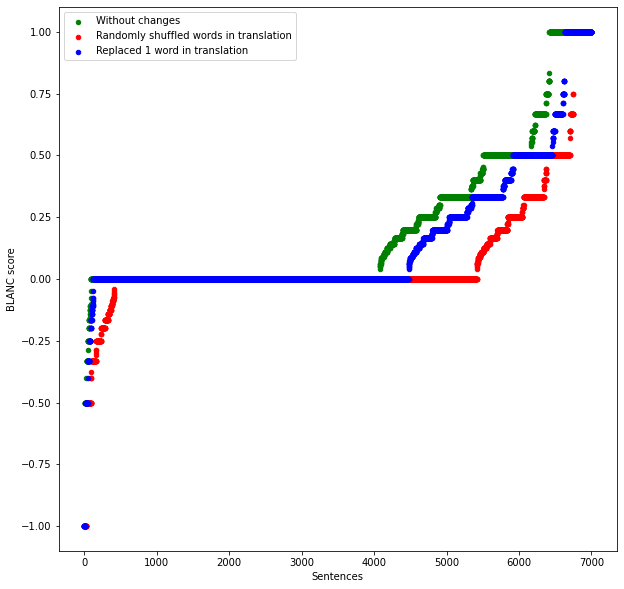

In [ ]:
ax1 = df.plot(kind='scatter', x='index_col', y='score', color='g', figsize=(10,10))    
ax2 = df_shuf.plot(kind='scatter', x='index_col', y='score', color='r', ax=ax1)    
ax3 = df_repl.plot(kind='scatter', x='index_col', y='score', color='b', ax=ax1)
ax1.set_xlabel("Sentences")
ax1.set_ylabel("BLANC score")
ax1.legend(['Without changes', "Randomly shuffled words in translation", "Replaced 1 word in translation" ])

# Compare with human anotators

In [ ]:
y1 = [df['assesor_1'].corr(df['mean23']), df['assesor_2'].corr(df['mean13']), df['assesor_3'].corr(df['mean12'])]
y2 = [df['assesor_1'].corr(df['score']), df['assesor_2'].corr(df['score']), df['assesor_3'].corr(df['score'])]
y1.sort()
y2.sort()
x = ['1', '2', '3']

Correlation of each assessor with other two (in red) and correlation of mean DA with BLANC score (in blue). 

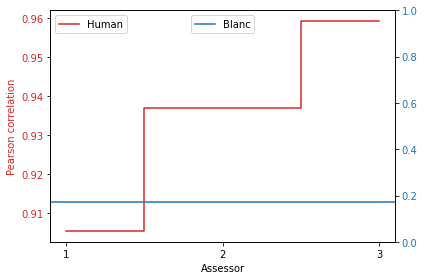

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Assessor')
ax1.set_ylabel('Pearson correlation', color=color)
ax1.step(x, y1, where= 'mid', color=color, label='Human')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.axhline(y=df['score'].corr(df['mean']), color=color, label='Blanc')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper center')

fig.tight_layout() 
plt.show()